In [35]:
def fib(n):
    res_storage = [1, 1] + [0] * (n - 1)
    return _fib(n, res_storage)

def _fib(n, r):
    if r[n] != 0:
        return r[n]
    r[n] = _fib(n - 1, r) + _fib(n - 2, r)
    return r[n]
    
fib(5)

8

In [3]:
def fib_bottom_up(n):
    res_storage = [1, 1]
    for j in range(2, n + 1):
        res_storage.append(res_storage[j - 1] + res_storage[j - 2])
        
    return res_storage[n]

fib_bottom_up(6)

13

In [4]:
def cut_rod(p, n):
    if n == 0:
        return 0
    
    q = p[0]
    for i in range(1, n):
        q = max(q, p[i] + cut_rod(p, n - i))
    return q

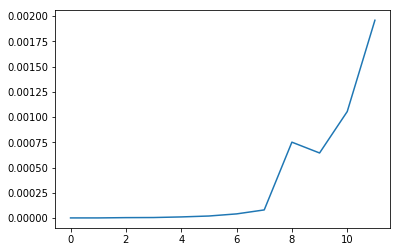

In [46]:
import time
from random import randint
from matplotlib import pyplot as plt

N = 12

price_table = []
for i in range(N):
    elem = randint(i, i + 5*i)
    price_table.append(elem)

runtimes = []
for n in range(N):
    start = time.time()
    cut_rod(price_table, n)
    runtimes.append(time.time() - start)
    
plt.plot(range(N), runtimes)
plt.show()

In [50]:
def cut_rod_bottom_up(p, n):
    best_res = [0] * (n + 1)
    sol_storage = [0] * (n + 1)
    
    for j in range(1, n + 1):
        cur_best = p[0]
        for i in range(1, j + 1):
            if cur_best < p[i] + best_res[j - i]:
                cur_best = p[i] + best_res[j - i]
                sol_storage[j] = i
        best_res[j] = cur_best
        
    return best_res, sol_storage

def print_cut_rod_solution(p, n):
    _, solutions = cut_rod_bottom_up(p, n)
    while n > 0:
        print(solutions[n])
        n = n - solutions[n]
        
print_cut_rod_solution(price_table, 5)

1
1
3
